# Customer Churn Prediction Model


This project aims to leverage historical customer data and machine learning algorithms to build an accurate churn prediction model.  
By identifying customers likely to churn, companies can take targeted actions to address their concerns,   
offer tailored incentives, or improve their overall experience,   
ultimately reducing customer attrition and its associated costs.

## Data

This dataset contains customer information and attributes relevant to assessing customer churn, which refers to the likelihood of customers leaving a service or company. The dataset's primary objective is to provide insights into customer behavior and help determine whether a customer will churn or not. Each row in the dataset represents a customer with specific attributes, and the "Churn" column indicates whether the customer has churned (1) or not (0).

Dataset Attributes:
- **CustomerId**: The unique identifier for each customer.
- **Surname**: The last name of the customer.
- **CreditScore**: The credit score of the customer.
- **Geography**: The geographical location of the customer.
- **Gender**: The gender of the customer.
- **Age**: The age of the customer.
- **Tenure**: The number of years the customer has been with the company.
- **Balance**: The account balance of the customer.
- **NumOfProducts**: The number of products the customer has with the company.
- **IsActiveMember**: Whether the customer is an active member (1) or not (0).
- **Churn**: Whether the customer has churned (1) or not (0).

## Machine Learning Task:
This dataset is suitable for a supervised binary classification task, where machine learning models   
can be trained to predict customer churn based on the provided attributes.   
The models aim to classify customers as churned (1) or not churned (0).


## Exploratory Data Analysis (EDA)
EDA is a crucial aspect of data science that helps in understanding the underlying structure of the data. It involves analyzing and summarizing data visually and statistically to uncover patterns or relationships. The main goals of EDA include:

## Gaining a deeper understanding of the data
- Identifying data quality issues
- Developing initial insights and hypotheses
- Selecting features for modeling or further analysis

In [6]:
# import modules
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Loading and Read the dataset

In [7]:
# read the csv
df = pd.read_csv('data/Customer_Churn.csv')

# number of lows and columns
rows = df.shape[0]
columns = df.shape[1]

# print the number of rows and columns
print('Number of rows: ', rows)
print('Number of columns: ', columns)

# view the first 5 rows
df.head()

Number of rows:  10000
Number of columns:  13


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### DATA CLEANING

Check the missing data

Dealing with missing values is a crucial aspect of data cleaning and preprocessing, as missing data can lead to biased analysis and inaccurate results.

In [8]:
# check for missing values
missing = df.isnull().sum()

# print the missing values
print(missing)

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Churned            0
dtype: int64


Now that we see that there are no missing values, let us check for unnecessary features among the ones in our dataset.

In [9]:
# drop the CustomerID column and the surname column
df = df.drop(['CustomerId', 'Surname'], axis=1)

# view the first 5 rows
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Data Exploration:
Exploring the data is the next step in the EDA process. It helps to identify patterns   
and trends and forms the basis of the data analysis phase.

### DATA VISUALIZATION
Data Visualization makes it easy to grasp the information the data express.

#### 1. pie chart
Let us check about potability, what is the percentage of churned customers and unchurned customers from our customers samples.

<Axes: ylabel='count'>

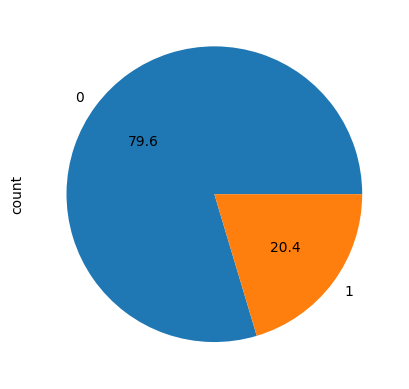

In [10]:
# plot the pie chart of the target variable
df['Churned'].value_counts().plot(kind='pie', autopct='%.1f')


This shows that only 20.4% percent of the customers recorded in our sample churned.

### 2. Correlation Map

Correlation maps can help identify patterns of association between variables and   
guide feature selection or identify potential multicollinearity issues in regression models.

### Convert Categorical Columns to Numerical

Since we need to include categorical columns in the correlation matrix, we must convert them to numerical values  
using techniques such as one-hot encoding or label encoding. 

In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])

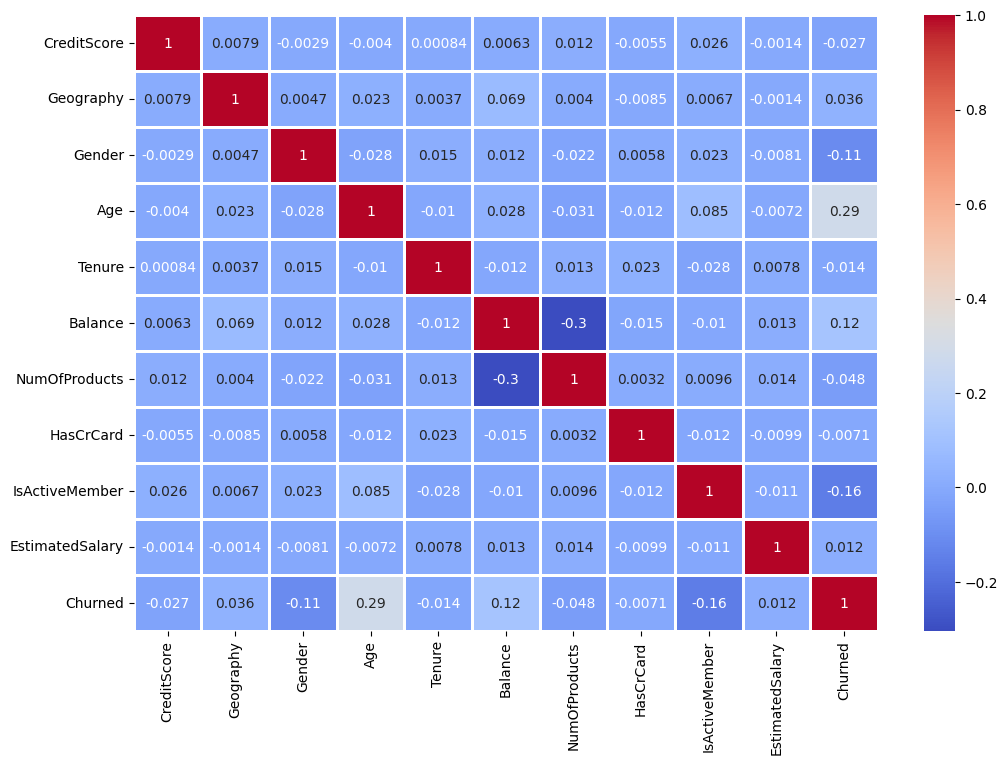

In [12]:
# plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=2)
plt.show()

Conclusion: generally our features have mixed correlation with each other.  
but the exception arises with customers number of products and their balance which shows a strong negative correlaton  
meaning as the number of products increases the balance tends to decrease and vice versa.

## Get the target and the features of the data

In the data set, we will go ahead to extract the features of the columns and at the same time   
get the target features in our case the churned column.

In [13]:
# split the data into features and target
X = df.drop('Churned', axis=1)
y = df['Churned']

# Display the X features
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


## Data Normalization

### Standard Scaler
Python sklearn library offers us with StandardScaler() function to standardize the data values into a standard format.

it transforms the distribution of each feature to have a mean of zero and a standard deviation of one.

This process ensures that all features are on the same scale, preventing any single feature from dominating the learning process due to its larger magnitude.

In [14]:
# make it a function for reusability
scaler = StandardScaler()


def normalize_data(X):
    normalized_data = scaler.fit_transform(X)
    return normalized_data

# normalize the data
X_normalized = normalize_data(X)

# print the normalized data
print(X_normalized[:5])

[[-0.32622142 -0.90188624 -1.09598752  0.29351742 -1.04175968 -1.22584767
  -0.91158349  0.64609167  0.97024255  0.02188649]
 [-0.44003595  1.51506738 -1.09598752  0.19816383 -1.38753759  0.11735002
  -0.91158349 -1.54776799  0.97024255  0.21653375]
 [-1.53679418 -0.90188624 -1.09598752  0.29351742  1.03290776  1.33305335
   2.52705662  0.64609167 -1.03067011  0.2406869 ]
 [ 0.50152063 -0.90188624 -1.09598752  0.00745665 -1.38753759 -1.22584767
   0.80773656 -1.54776799 -1.03067011 -0.10891792]
 [ 2.06388377  1.51506738 -1.09598752  0.38887101 -1.04175968  0.7857279
  -0.91158349  0.64609167  0.97024255 -0.36527578]]


Split the data into training and testing sets

In [15]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# print the shape of the training and testing sets
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


print('')
print('Splitting the data into training and validation sets')
print('')

# print the shape of the training and validation sets
print('X_train shape: ', X_train.shape)
print('X_val shape: ', X_val.shape)
print('y_train shape: ', y_train.shape)
print('y_val shape: ', y_val.shape)


X_train shape:  (8000, 10)
X_test shape:  (2000, 10)
y_train shape:  (8000,)
y_test shape:  (2000,)

Splitting the data into training and validation sets

X_train shape:  (6400, 10)
X_val shape:  (1600, 10)
y_train shape:  (6400,)
y_val shape:  (1600,)


# Building a Neural Network for Binary Classification using tensorflow

In the next cell, we define a function neural_net that constructs and compiles  
a neural network model using the TensorFlow Keras API. The function takes an optional parameter regularizer,  
which allows us to apply regularization or not to the Dense layers in the network.

In [16]:
# create a model function that takes in a regularizer
def model(regularizer=None):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizer),
        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizer),
        tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizer),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy'])

    return model

Create an instance of our unregularized model

In [17]:
# unregularized model
unregularized_model = model(None)

# unregularized model summary
unregularized_model.summary()

/Users/macbook2015/ml/unchurn/.venv/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,777 (46.00 KB)

 Trainable params: 11,777 (46.00 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# train the unregularized model
unregularized_model_history = unregularized_model.fit(X_train, y_train, epochs=100, batch_size = 32, validation_data=(X_val, y_val))

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7707 - loss: 0.5008 - val_accuracy: 0.8481 - val_loss: 0.3713
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8560 - loss: 0.3623 - val_accuracy: 0.8500 - val_loss: 0.3559
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8533 - loss: 0.3527 - val_accuracy: 0.8587 - val_loss: 0.3442
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8575 - loss: 0.3437 - val_accuracy: 0.8594 - val_loss: 0.3381
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8618 - loss: 0.3372 - val_accuracy: 0.8612 - val_loss: 0.3428
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8590 - loss: 0.3374 - val_accuracy: 0.8550 - val_loss: 0.3482
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8716 - loss: 0.3163 - val_accuracy: 0.8519 - val_loss: 0.3565
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8630 - loss: 0.3314 - val_accu

Comment: For an unregularized model obviously there is a very huge overfitting that can be minimized  
considering a difference of 0.1769 and 1.117 in both accuracies and losses.

Meaning our model learned the train set itself instead of the pattern between features in this set.

### Avisual representantion of the performance of the Unregularized Model

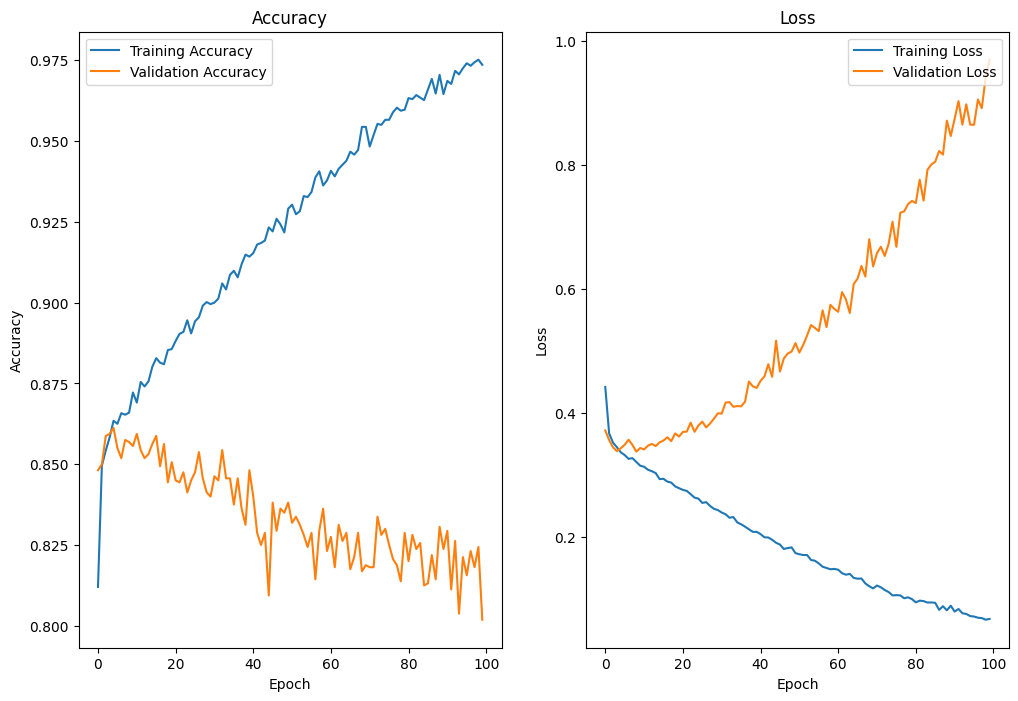

In [19]:
# plot the training and validation accuracy
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(unregularized_model_history.history['accuracy'], label='Training Accuracy')
plt.plot(unregularized_model_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.title('Accuracy')


# plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(unregularized_model_history.history['loss'], label='Training Loss')
plt.plot(unregularized_model_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

### Save the unregularized model

In [20]:
from tensorflow import keras

# save unregularized model
unregularized_model.save('saved_models/unregularized_model.h5')

# Introduce Regularization

## First L2 Regularization

implement regularization to the model to penalize large weights and prevent overfitting

In [21]:
# L2 regularization
regularizer = tf.keras.regularizers.l2(0.001)
l2_model = model(regularizer)

# train the L2 regularized model
l2_model_history = l2_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7987 - loss: 0.6213 - val_accuracy: 0.8381 - val_loss: 0.4801
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8325 - loss: 0.4931 - val_accuracy: 0.8494 - val_loss: 0.4355
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8511 - loss: 0.4303 - val_accuracy: 0.8619 - val_loss: 0.4083
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8533 - loss: 0.4071 - val_accuracy: 0.8631 - val_loss: 0.3956
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8592 - loss: 0.3954 - val_accuracy: 0.8612 - val_loss: 0.3881
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8633 - loss: 0.3905 - val_accuracy: 0.8556 - val_loss: 0.3905
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8615 - loss: 0.3806 - val_accuracy: 0.8575 - val_loss: 0.3805
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8570 - loss: 0.3769 - val_accu

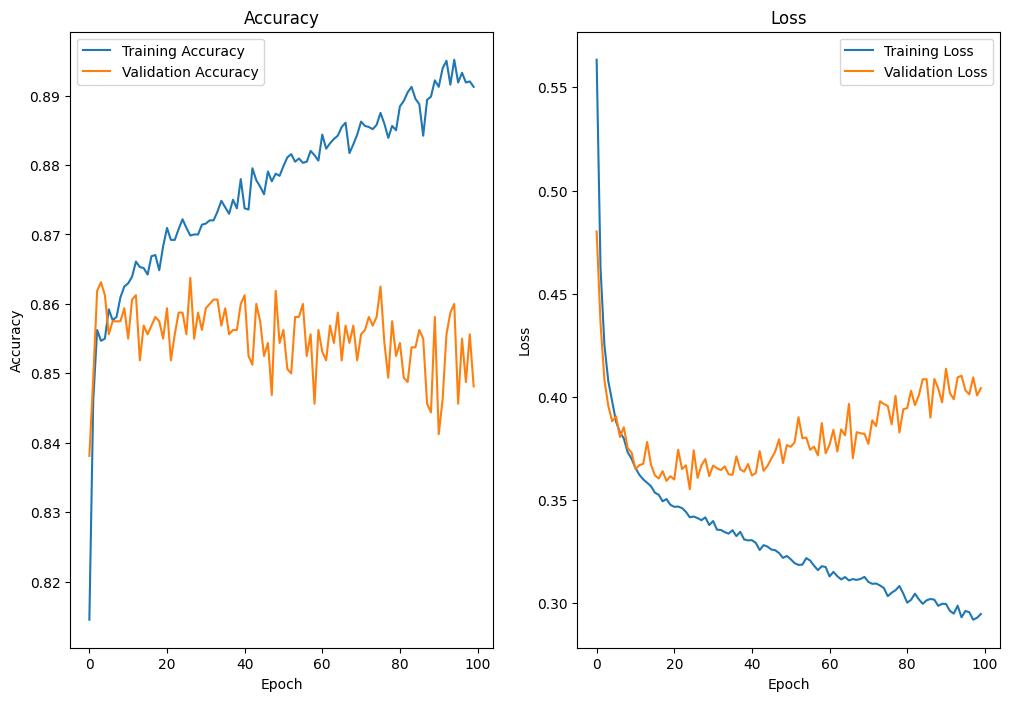

In [22]:
# plot the training and validation accuracy
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(l2_model_history.history['accuracy'], label='Training Accuracy')
plt.plot(l2_model_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.title('Accuracy')


# plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(l2_model_history.history['loss'], label='Training Loss')
plt.plot(l2_model_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

Comment: there is a really good improvement with the regularization now the respective differences are just  
0.0473 and 0.1107. what if we could minimize it a little bit further by introducing dropouts.

# Introducing Drop Out
 Dropout is a regularization technique for neural networks that drops a unit (along with connections) at training time with a specified probability p.

 The idea is to prevent co-adaptation, where the neural network becomes too reliant on particular connections, as this could be symptomatic of overfitting.

In [23]:
def l2_dropout_model(regularizer=None):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizer),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizer),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizer),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy'])

    return model

# L2 regularization
regularizer = tf.keras.regularizers.l2(0.001)
regularized_model = l2_dropout_model(regularizer=regularizer)

# train the regularized model
regularized_model_history = regularized_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7080 - loss: 0.6965 - val_accuracy: 0.8144 - val_loss: 0.5179
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8100 - loss: 0.5386 - val_accuracy: 0.8500 - val_loss: 0.4575
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8178 - loss: 0.5059 - val_accuracy: 0.8619 - val_loss: 0.4249
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8377 - loss: 0.4596 - val_accuracy: 0.8550 - val_loss: 0.4095
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8372 - loss: 0.4457 - val_accuracy: 0.8594 - val_loss: 0.3980
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8446 - loss: 0.4330 - val_accuracy: 0.8637 - val_loss: 0.3933
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8518 - loss: 0.4128 - val_accuracy: 0.8600 - val_loss: 0.3883
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8538 - loss: 0.3997 - val_accu

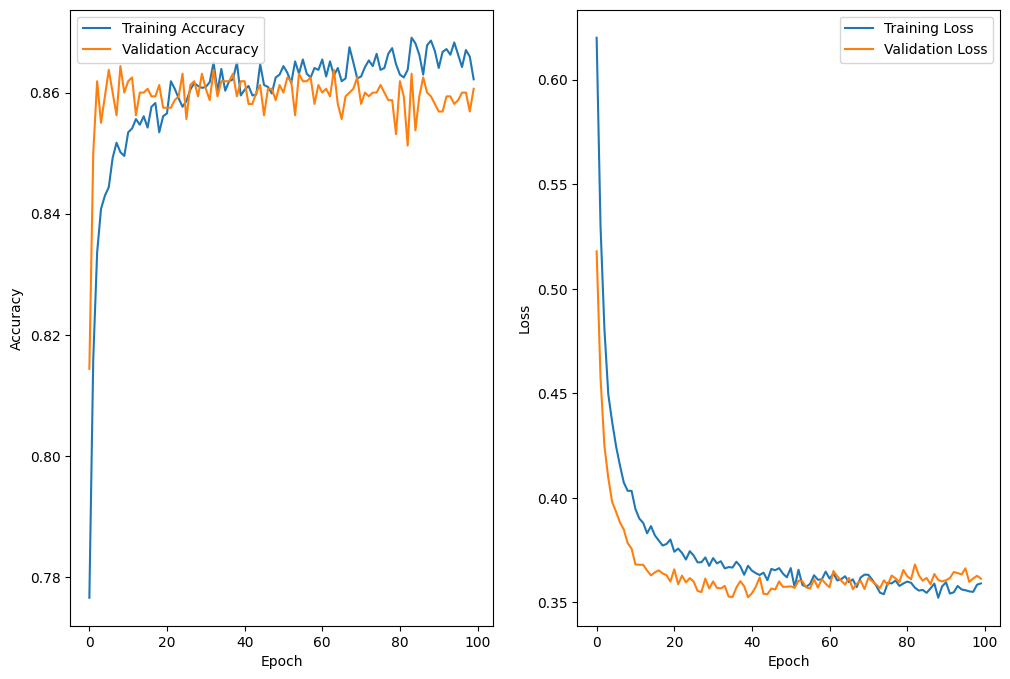

In [24]:
# visualize the training and validation accuracy
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(regularized_model_history.history['accuracy'], label='Training Accuracy')
plt.plot(regularized_model_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# visualize the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(regularized_model_history.history['loss'], label='Training Loss')
plt.plot(regularized_model_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

Comment: the overfitting is getting more minimized, 

with the respective differences being just 0.0019 and 0.007

let use introduce one last tecnique and see what progress we get.


# Introducing Early Stopping

A major challenge in training neural networks is how long to train them.

Too little training will mean that the model will underfit the train and the test sets. Too much training will mean that the model will overfit the training dataset and have poor performance on the test set.

A compromise is to train on the training dataset but to stop training at the point when performance on a validation set starts to degrade. 

In [30]:
# introduce early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# the usual l2 regularization
regularizer = tf.keras.regularizers.l2(0.001)
regularized_model = l2_dropout_model(regularizer=regularizer)

# train the regularized model with early stopping
regularized_model_history = regularized_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.7569 - loss: 0.6704 - val_accuracy: 0.8119 - val_loss: 0.5249
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8169 - loss: 0.5435 - val_accuracy: 0.8338 - val_loss: 0.4768
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8352 - loss: 0.4873 - val_accuracy: 0.8544 - val_loss: 0.4346
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8387 - loss: 0.4642 - val_accuracy: 0.8556 - val_loss: 0.4154
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8469 - loss: 0.4374 - val_accuracy: 0.8581 - val_loss: 0.4019
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8495 - loss: 0.4301 - val_accuracy: 0.8581 - val_loss: 0.3986
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8520 - loss: 0.4169 - val_accuracy: 0.8619 - val_loss: 0.3902
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8456 - loss: 0.4137 - val_acc

### Comment: 

Well, Now we got a verry small overfitting, and with an overall accurate model of 0.86 accuracy and 0.36 loss.
It is not very different from the first one but it is better.


PS: the respective differences now are **0.0015** and **0.0006**.

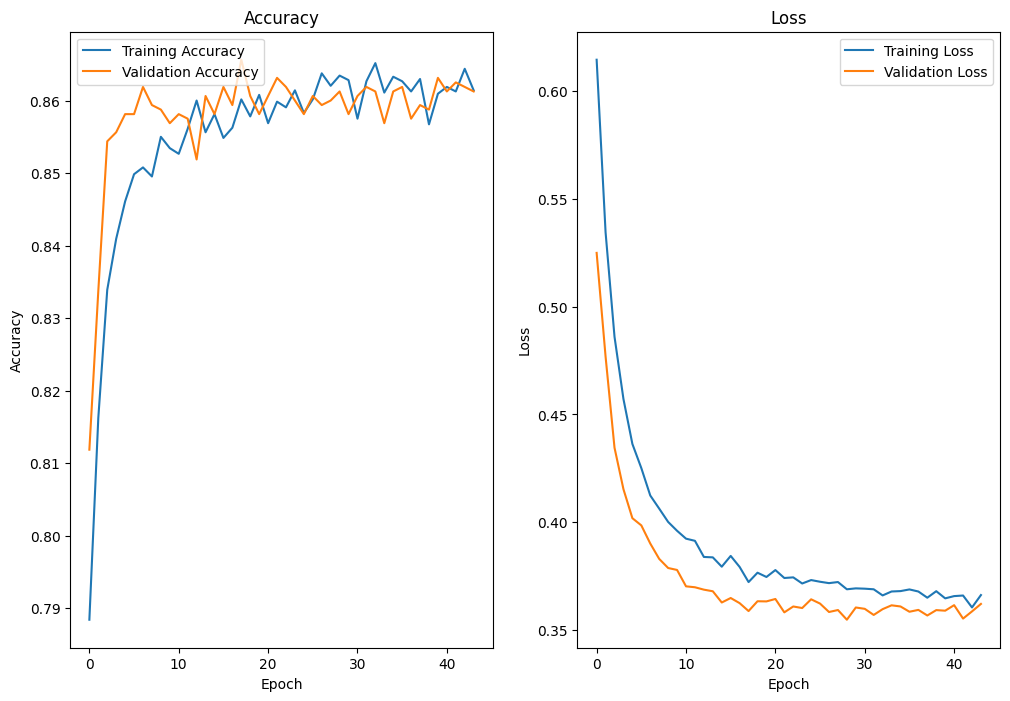

In [34]:
# visualize the training and validation accuracy
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(regularized_model_history.history['accuracy'], label='Training Accuracy')
plt.plot(regularized_model_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.title('Accuracy')

# visualize the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(regularized_model_history.history['loss'], label='Training Loss')
plt.plot(regularized_model_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()


## Save the regularized Model

In [35]:
# save the regularized model
regularized_model.save('saved_models/regularized_model.h5')

# A Confusion Matrix
A confusion matrix is a table that is used to evaluates the effectiveness of a machine learning model   
and helps in understanding the types and quantities of errors made by the model, and provides insights  
into the model’s strengths and weaknesses.

The columns represent the actual values of the target variable The rows represent the predicted values of the target variable

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


Text(0.5, 1.0, 'Confusion Matrix')

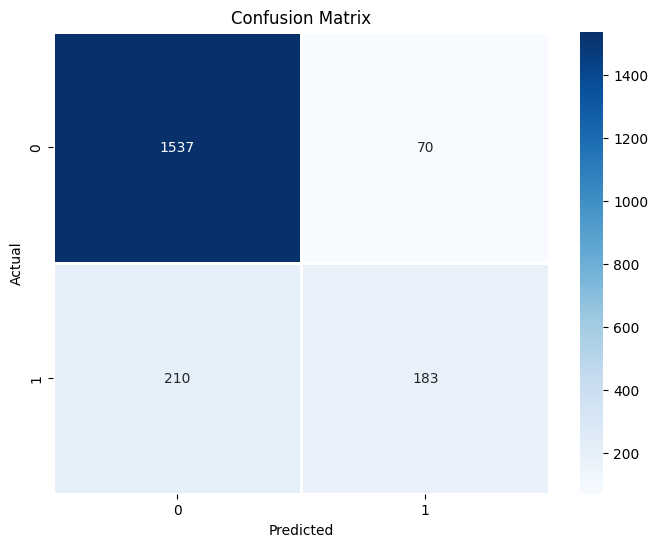

In [37]:
# let's print the confusion matrix
from sklearn.metrics import confusion_matrix

# make predictions (time to use the test set :laughing:)
y_pred = regularized_model.predict(X_test)
y_pred = np.round(y_pred)

# print the confusion matrix using seaborn
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt = "g", linewidths=2)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')